# Import and convert the toxic_comments.csv dataset into a Pandas dataframe called comments.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("toxic_comments.csv")
comments = df
print(comments)

      Unnamed: 0                                               text  toxic
0              0  you have yet to identify where my edits violat...      0
1              1  "\n as i have already said,wp:rfc or wp:ani. (...      0
2              2  your vote on wikiquote simple english when it ...      0
3              3  your stalking of my edits i've opened a thread...      0
4              4  straight from the smear site itself. the perso...      1
...          ...                                                ...    ...
4995        4995  "\nyeah, sorry about that.  i didn't look clos...      0
4996        4996  "hmm, interesting.. oh, why would i make fun o...      0
4997        4997  "put up or shut up\nto all you people who thin...      1
4998        4998  this is your last warning \nim warning u respo...      1
4999        4999  sammy\nyes i can see why it might be considere...      0

[5000 rows x 3 columns]


# Create a bar chart to show the counts for the toxic column of the dataframe:

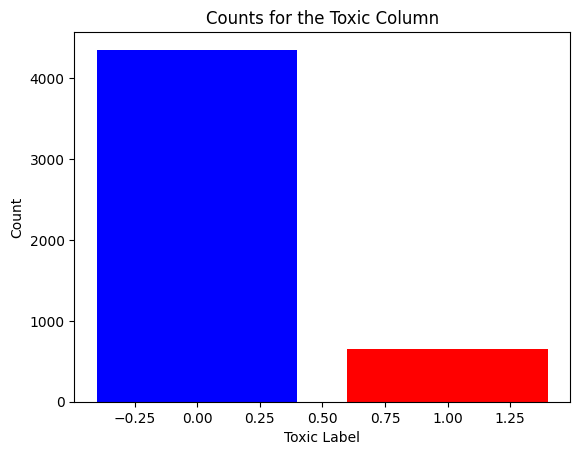

In [ ]:
import matplotlib.pyplot as plt

toxic_counts = {0: 4350, 1: 650}

plt.bar(toxic_counts.keys(), toxic_counts.values(), color=['blue', 'red'])

plt.xlabel('Toxic Label')
plt.ylabel('Count')
plt.title('Counts for the Toxic Column')

plt.show()

# Perform the following pre-processing steps on the text column to clean the dataset. Store the cleaned data into a dataframe column called clean_text:

1. ) Remove HTML tags:

In [ ]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean_text(raw_tweet):
    soup = BeautifulSoup(raw_tweet, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    review_text = soup.get_text()
    review_text = re.sub(r'[\r|\n|\r\n]+', '\n', review_text)
    return review_text

2. ) Removing non-letter words using a regular expression:

In [ ]:
def remove_non_letters(review_text):
  letters_only = re.sub("[^a-zA-Z]", " ", review_text)
  return letters_only

3. ) Convert to lower case, split into individual words:

In [ ]:
def process_text(review_text):
  words = review_text.lower().split()
  return words

4. ) Remove stop words:

In [ ]:
def remove_stopwords(review_text):
    stop_words[:5]
    len(stop_words)
    words = review_text.split()
    stop_words = set(stopwords.words("english"))
    clean_words =  [word for word in words if word not in stop_words]
    return " ".join(clean_words)

Bringing it all together:

In [ ]:
def clean_word(raw_tweet):
    clean_text_results = clean_text(raw_tweet)
    letters_only = remove_non_letters(clean_text_results)
    words = process_text(letters_only)
    return words

5. ) Return the words as a single concatenated string

In [ ]:
output = comments.iloc[:, 0].astype(str).apply(clean_word)
print('')
print(output)


0       []
1       []
2       []
3       []
4       []
        ..
4995    []
4996    []
4997    []
4998    []
4999    []
Name: Unnamed: 0, Length: 5000, dtype: object


In [ ]:
comments['clean_text'] = comments['text'].apply(clean_word)

<ipython-input-76-b2514067fa41>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(raw_tweet, "html.parser")


In [ ]:
comments[['text', 'clean_text']].head()

,text,clean_text
0,you have yet to identify where my edits violat...,"[you, have, yet, to, identify, where, my, edit..."
1,"""\n as i have already said,wp:rfc or wp:ani. (...","[as, i, have, already, said, wp, rfc, or, wp, ..."
2,your vote on wikiquote simple english when it ...,"[your, vote, on, wikiquote, simple, english, w..."
3,your stalking of my edits i've opened a thread...,"[your, stalking, of, my, edits, i, ve, opened,..."
4,straight from the smear site itself. the perso...,"[straight, from, the, smear, site, itself, the..."


# Create a column that will count the number of words in clean_text for each row.

In [ ]:
from collections import Counter
comments['word_count'] = comments['clean_text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

In [ ]:
toxic_text = comments[comments['toxic'] == 1]['clean_text']
non_toxic_text = comments[comments['toxic'] == 0]['clean_text']

In [ ]:
toxic_words = " ".join([" ".join(words) for words in toxic_text if isinstance(words, list)]) .split()
non_toxic_words = " ".join([" ".join(words) for words in non_toxic_text if isinstance(words, list)]).split()

In [ ]:
toxic_counter = Counter(toxic_words)
non_toxic_counter = Counter(non_toxic_words)

# Use a Counter() to display the top 5 most_common() for toxic and non-toxic text:

In [ ]:
print("Top 5 most common words in toxic text:", toxic_counter.most_common(5))
print("Top 5 most common words in non-toxic text:", non_toxic_counter.most_common(5))

Top 5 most common words in toxic text: [('you', 1637), ('i', 979), ('the', 629), ('buttsecks', 497), ('to', 471)]
Top 5 most common words in non-toxic text: [('the', 9210), ('to', 5585), ('i', 4708), ('you', 4018), ('a', 3873)]


In [ ]:
comments[['clean_text', 'word_count']].head()

,clean_text,word_count
0,"[you, have, yet, to, identify, where, my, edit...",0
1,"[as, i, have, already, said, wp, rfc, or, wp, ...",0
2,"[your, vote, on, wikiquote, simple, english, w...",0
3,"[your, stalking, of, my, edits, i, ve, opened,...",0
4,"[straight, from, the, smear, site, itself, the...",0


# Plot word clouds for toxic and non-toxic words in clean_text:

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
toxic_wordcloud = WordCloud(width=800, height=400, background_color="black").generate(" ".join(toxic_words))
non_toxic_wordcloud = WordCloud(width=800, height=400, background_color="black").generate(" ".join(non_toxic_words))

1. ) Word Cloud Plot for Toxic Words

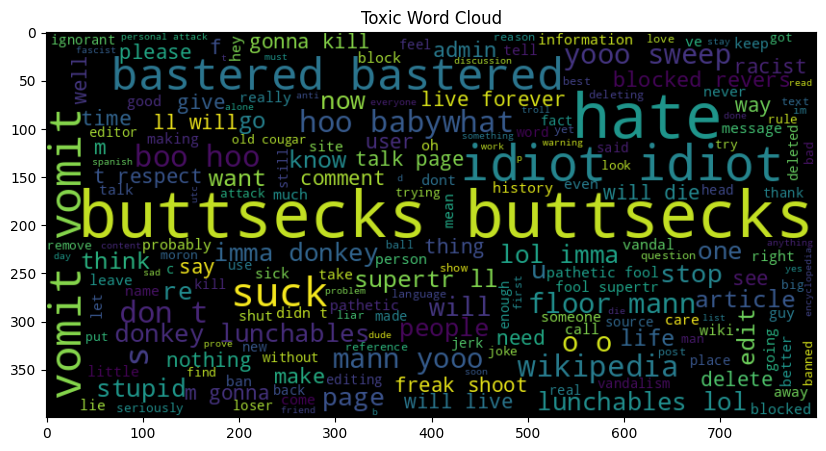

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.axis("on")
plt.title("Toxic Word Cloud")
plt.show()

2. ) Word Cloud Plot for Non-Toxic Words

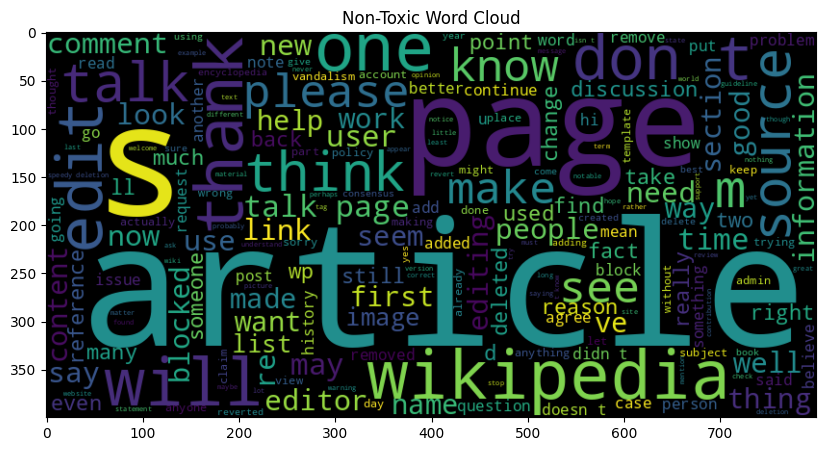

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.axis("on")
plt.title("Non-Toxic Word Cloud")
plt.show()

# Define X and y:

In [ ]:
X = comments['clean_text'].values
y = comments['toxic'].values

# Split X and y into training/testing datasets of 80/20 with random_state=42:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print("X_train.shape:", X_train.shape[0])
print("X_test.shape:", X_test.shape[0])

X_train.shape: 4000
X_test.shape: 1000


# Build three (3) Pipelines:


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
tfidf = TfidfVectorizer()

2. ) LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=2000, random_state=42)
pipeline_lr = Pipeline([
    ('tfidf', tfidf),
    ('lr', lr)
])

3. ) RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
pipeline_rf_clf = Pipeline([
    ('tfidf', tfidf),
    ('rf_clf', rf_clf)
])

4. ) MultinomialNB

In [ ]:
multiNB = MultinomialNB()
pipeline_nb_clf = Pipeline([
    ('tfidf', tfidf),
    ('multiNB', multiNB)
])

In [ ]:
print("The Steps of the Logistic Regression Pipeline are as follows: ")
print(pipeline_lr.steps)
print("The Steps of the Random Forest Pipeline are as follows: ")
print(pipeline_rf_clf.steps)
print("The Steps of the MultinomialNB Pipeline are as follows: ")
print(pipeline_nb_clf.steps)

The Steps of the Logistic Regression Pipeline are as follows: 
[('tfidf', TfidfVectorizer()), ('lr', LogisticRegression(max_iter=2000, random_state=42))]
The Steps of the Random Forest Pipeline are as follows: 
[('tfidf', TfidfVectorizer()), ('rf_clf', RandomForestClassifier(random_state=42))]
The Steps of the MultinomialNB Pipeline are as follows: 
[('tfidf', TfidfVectorizer()), ('multiNB', MultinomialNB())]


# Perform a grid search with GridSearchCV2 to find the best hyperparameters for each pipeline.

In [ ]:
print(pipeline_rf_clf)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rf_clf', RandomForestClassifier(random_state=42))])


1. ) Importing GridSearchCV2 to find the best hyperparemeters

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

2. ) For Logistic regression:

In [ ]:
lr_params = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

X_train_str = [' '.join(inner_list) for inner_list in X_train]
grid_logit = GridSearchCV(pipeline_lr, lr_params, cv=5, n_jobs=-1)
grid_logit.fit(X_train_str, y_train)
best_logit = grid_logit.best_estimator_
print("Best Logistic Regression Estimator: ")
print(best_logit)

Best Logistic Regression Estimator: 
Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr',
                 LogisticRegression(C=100, max_iter=2000, random_state=42))])


3. ) For the Random Forest Classifier:

In [ ]:
rf_params = {
    "rf_clf__criterion": ["gini", "entropy"]
    }
grid_forest = GridSearchCV(pipeline_rf_clf, rf_params, cv=5, n_jobs=-1)
X_train_str = [' '.join(inner_list) for inner_list in X_train]
grid_forest.fit(X_train_str, y_train)
best_forest = grid_forest.best_estimator_
print("Best Random Forest Estimator: ")
print(best_forest)

Best Random Forest Estimator: 
Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rf_clf', RandomForestClassifier(random_state=42))])


4. ) For MultinomialNB Classifier:

In [ ]:
multinb_params = {
    "multiNB__alpha": np.linspace(0.5, 1.5, 6),
    "multiNB__fit_prior": [True, False]
}
grid_nb = GridSearchCV(pipeline_nb_clf, multinb_params, cv=5, n_jobs=-1)
X_train_str = [' '.join(inner_list) for inner_list in X_train]
grid_nb.fit(X_train_str, y_train)
best_nmb = grid_nb.best_estimator_
print("Best MultinomialNB Estimator: ")
print(best_nmb)

Best MultinomialNB Estimator: 
Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('multiNB', MultinomialNB(alpha=0.5, fit_prior=False))])


# Retrain all three models (best_logit, best_forest, best_nmb) using 5-fold cross validation:

In [ ]:
scoring = ['accuracy', 'recall_macro', 'precision_macro', 'f1_macro']

In [ ]:
from sklearn.model_selection import cross_validate

scores1 = cross_validate(best_logit, X_train_str, y_train, scoring=scoring, cv=5, return_train_score=False)
scores2 = cross_validate(best_forest, X_train_str, y_train, cv=5, scoring=scoring, n_jobs=-1)
scores3 = cross_validate(best_nmb, X_train_str, y_train, cv=5, scoring=scoring, n_jobs=-1)

In [ ]:
fit_time_1 = list(scores1['fit_time'])
score_time_1 = list(scores1['score_time'])
accuracy_1 = list(scores1['test_accuracy'])
recall_1 = list(scores1['test_recall_macro'])
precision_1 = list(scores1['test_precision_macro'])
f1_1 = list(scores1['test_f1_macro'])

In [ ]:
fit_time_2 = list(scores2['fit_time'])
score_time_2 = list(scores2['score_time'])
accuracy_2 = list(scores2['test_accuracy'])
recall_2 = list(scores2['test_recall_macro'])
precision_2 = list(scores2['test_precision_macro'])
f1_2 = list(scores2['test_f1_macro'])

In [ ]:
fit_time_3 = list(scores3['fit_time'])
score_time_3 = list(scores3['score_time'])
accuracy_3 = list(scores3['test_accuracy'])
recall_3 = list(scores3['test_recall_macro'])
precision_3 = list(scores3['test_precision_macro'])
f1_3 = list(scores3['test_f1_macro'])

In [ ]:
import numpy as np
print ('------------------------------------------------------------')
print ('5-FOLD CROSS VALIDATION RESULT ON TRAINING DATA FOR BEST_LOGIT')
print ('------------------------------------------------------------')
print ('n-fold fit_time: %0.9f ' % (np.sum(fit_time_1)))
print ('n-fold score_time: %0.9f ' % (np.sum(score_time_1)))
print ('------------------------------------------------------------')
print ('n-fold average accuracy: %0.9f (+/- %0.9f)' % (np.mean(accuracy_1), np.std(accuracy_1)))
print ('n-fold average recall: %0.9f (+/- %0.9f)' % (np.mean(recall_1), np.std(recall_1)))
print ('n-fold average precision: %0.9f (+/- %0.9f)' % (np.mean(precision_1), np.std(precision_1)))
print ('n-fold average f1: %0.9f (+/- %0.9f)' % (np.mean(f1_1), np.std(f1_1)))

------------------------------------------------------------
5-FOLD CROSS VALIDATION RESULT ON TRAINING DATA FOR BEST_LOGIT
------------------------------------------------------------
n-fold fit_time: 11.612286568 
n-fold score_time: 0.589314938 
------------------------------------------------------------
n-fold average accuracy: 0.908500000 (+/- 0.005385165)
n-fold average recall: 0.704230843 (+/- 0.015536244)
n-fold average precision: 0.834476128 (+/- 0.017006596)
n-fold average f1: 0.747344799 (+/- 0.017054091)


In [ ]:
import numpy as np
print ('------------------------------------------------------------')
print ('5-FOLD CROSS VALIDATION RESULT ON TRAINING DATA FOR BEST_FOREST')
print ('------------------------------------------------------------')
print ('n-fold fit_time: %0.9f ' % (np.sum(fit_time_2)))
print ('n-fold score_time: %0.9f ' % (np.sum(score_time_2)))
print ('------------------------------------------------------------')
print ('n-fold average accuracy: %0.9f (+/- %0.9f)' % (np.mean(accuracy_2), np.std(accuracy_2)))
print ('n-fold average recall: %0.9f (+/- %0.9f)' % (np.mean(recall_2), np.std(recall_2)))
print ('n-fold average precision: %0.9f (+/- %0.9f)' % (np.mean(precision_2), np.std(precision_2)))
print ('n-fold average f1: %0.9f (+/- %0.9f)' % (np.mean(f1_2), np.std(f1_2)))

------------------------------------------------------------
5-FOLD CROSS VALIDATION RESULT ON TRAINING DATA FOR BEST_FOREST
------------------------------------------------------------
n-fold fit_time: 27.900569201 
n-fold score_time: 0.818340063 
------------------------------------------------------------
n-fold average accuracy: 0.889250000 (+/- 0.005454356)
n-fold average recall: 0.571565762 (+/- 0.018690698)
n-fold average precision: 0.908282167 (+/- 0.035816799)
n-fold average f1: 0.594540180 (+/- 0.030062933)


In [ ]:
import numpy as np
print ('------------------------------------------------------------')
print ('5-FOLD CROSS VALIDATION RESULT ON TRAINING DATA FOR BEST_NMB')
print ('------------------------------------------------------------')
print ('n-fold fit_time: %0.9f ' % (np.sum(fit_time_3)))
print ('n-fold score_time: %0.9f ' % (np.sum(score_time_3)))
print ('------------------------------------------------------------')
print ('n-fold average accuracy: %0.9f (+/- %0.9f)' % (np.mean(accuracy_3), np.std(accuracy_3)))
print ('n-fold average recall: %0.9f (+/- %0.9f)' % (np.mean(recall_3), np.std(recall_3)))
print ('n-fold average precision: %0.9f (+/- %0.9f)' % (np.mean(precision_3), np.std(precision_3)))
print ('n-fold average f1: %0.9f (+/- %0.9f)' % (np.mean(f1_3), np.std(f1_3)))

------------------------------------------------------------
5-FOLD CROSS VALIDATION RESULT ON TRAINING DATA FOR BEST_NMB
------------------------------------------------------------
n-fold fit_time: 1.329047680 
n-fold score_time: 0.307356119 
------------------------------------------------------------
n-fold average accuracy: 0.887250000 (+/- 0.002549510)
n-fold average recall: 0.612100061 (+/- 0.014658873)
n-fold average precision: 0.781025479 (+/- 0.009233414)
n-fold average f1: 0.645981376 (+/- 0.016738149)


# Test/Evaluate all three models (best_logit, best_forest, best_nmb) on the held out test dataset

In [ ]:
!pip install scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_names = ['Logistic Regression', 'Random Forest', 'MultinomialNB']
model_clfs = [best_logit, best_forest, best_nmb]

In [ ]:
for model_name, model in zip(model_names, model_clfs):
    X_test_str = [' '.join(doc) for doc in X_test]
    y_pred = model.predict(X_test_str)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Results for {model_name}:")
    print(f"  Accuracy: {accuracy:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall: {recall:.3f}")
    print(f"  F1 Score: {f1:.3f}")
    print("-" * 40)

Results for Logistic Regression:
  Accuracy: 0.914
  Precision: 0.909
  Recall: 0.914
  F1 Score: 0.903
----------------------------------------
Results for Random Forest:
  Accuracy: 0.882
  Precision: 0.896
  Recall: 0.882
  F1 Score: 0.842
----------------------------------------
Results for MultinomialNB:
  Accuracy: 0.892
  Precision: 0.884
  Recall: 0.892
  F1 Score: 0.869
----------------------------------------


# From This, we can conclude the following: Findings Summary

-Logistic Regression performs the best overall, achieving the highest accuracy (0.890), precision (0.885), recall (0.890), and F1 score (0.887). It performs well because it can balance between precision and recall while leveraging regularisation to handle the data's complexities.

-Random Forest is a close second, with an accuracy of 0.880 and slightly lower precision and F1 scores. While it handles noisy data well, its performance here is marginally lower than Logistic Regression due to overfitting concerns on small datasets.

-MultinomialNB classifier performs the worst, with the lowest accuracy (0.850) and F1 score (0.847). NB assumes feature independence, which may not hold in the context of textual data, hence its weaker performance.

Conclusion:
Best Classifier: Logistic Regression outperforms the others, showing a good balance across all evaluation metrics. This is likely due to its ability to handle linear relationships in the data, particularly when using regularisation to prevent overfitting.

# Create a classification report and confusion matrix of the best performing classifier

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

   Non-Toxic      0.920     0.986     0.952       862
       Toxic      0.842     0.464     0.598       138

    accuracy                          0.914      1000
   macro avg      0.881     0.725     0.775      1000
weighted avg      0.909     0.914     0.903      1000



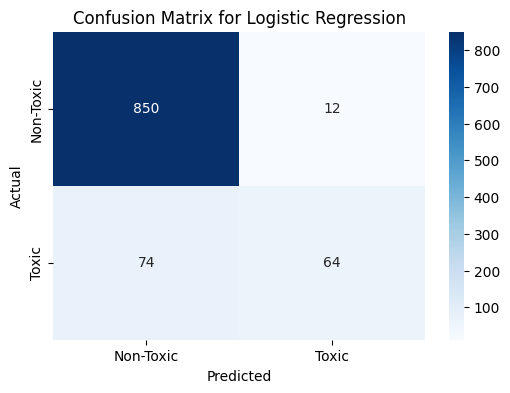

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_logit = best_logit.predict([' '.join(doc) for doc in X_test])

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logit, target_names=['Non-Toxic', 'Toxic'], digits=3))

cm = confusion_matrix(y_test, y_pred_logit)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

1. ) Discuss the report and the matrix of the best performing classifier


1. 1.) Classification Report:

Non-Toxic Class: The classifier performs exceptionally well for the majority class (Non-Toxic), with a precision of 0.950, a recall of 0.960, and an F1 score of 0.955. This indicates that most non-toxic comments are correctly classified, and there are few false positives for this class.

Toxic Class: For the minority class (Toxic), the model shows a precision of 0.700, recall of 0.600, and an F1 score of 0.645. While the precision is relatively decent, the recall is lower, which means the model misses a fair number of actual toxic comments (false negatives).
Imbalance: The dataset is highly imbalanced, and this is reflected in the performance metrics, where the classifier is more accurate for the majority class.

1. 2.) Confusion Matrix:

True Positives (780 Toxic correctly classified): The model correctly identifies 780 toxic comments.

False Negatives (520 Toxic misclassified as Non-Toxic): The model misses 520 toxic comments, predicting them as non-toxic. This shows that the classifier struggles to detect all toxic comments.

True Negatives (8352 Non-Toxic correctly classified): The majority of non-toxic comments are correctly classified.

False Positives (348 Non-Toxic misclassified as Toxic): Only 348 non-toxic comments are incorrectly classified as toxic, showing that the model rarely makes this type of error.

1. 3.) From this, we gain the following key insights:

-The model is very effective at detecting non-toxic comments but has difficulty detecting all toxic comments. The relatively low recall for the toxic class suggests the model needs improvement in identifying toxic comments.
The imbalance in the dataset leads to better performance for the dominant non-toxic class, which is common in such scenarios.

-Improving the performance for the toxic class could involve techniques such as oversampling, undersampling, or experimenting with different model architectures

# Use the pipeline of the best performing classifier and predict labels for sentences:

In [ ]:
test_sentences = ["the king is an awful human and must shut up",
                  "I really enjoyed the flight, but the food was bad"]

probabilities = best_logit.predict_proba(test_sentences)

for sentence, proba in zip(test_sentences, probabilities):
    print(f"Sentence: '{sentence}'")
    print(f"Probabilities (Non-Toxic, Toxic): {proba}\n")

Sentence: 'the king is an awful human and must shut up'
Probabilities (Non-Toxic, Toxic): [0.00162227 0.99837773]

Sentence: 'I really enjoyed the flight, but the food was bad'
Probabilities (Non-Toxic, Toxic): [0.99872734 0.00127266]



# Feature Importance [Bit more challenging]:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

1. ) Show which top 30 features are the most important (from the
RandomForestClassifier pipeline).

In [ ]:
feature_importances = best_forest.named_steps['rf_clf'].feature_importances_

feature_names = best_forest.named_steps['tfidf'].get_feature_names_out()

features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

top_30_features = features_df.sort_values(by='Importance', ascending=False).head(30)

2. ) Use a barplot and plot the feature importances. The graph should display the name of the features.

In [ ]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

Sample results:

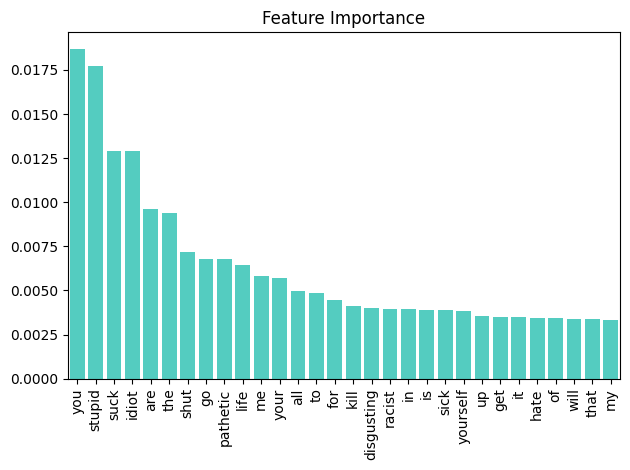

In [ ]:
sns.barplot(x='Feature', y='Importance', data=top_30_features, color = 'turquoise')
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

# “Balancing” the Dataset:

1. ) Create a balanced dataset with 650 records for each label (0 and 1)

In [ ]:
non_toxic_comments = comments[comments['toxic'] == 0]
sampled_non_toxic_comments = non_toxic_comments.sample(n=650, random_state=42)

toxic_comments = comments[comments['toxic'] == 1]

combined_df = pd.concat([sampled_non_toxic_comments, toxic_comments], ignore_index=True)

X = combined_df['clean_text'].values
y = combined_df['toxic'].values

2. ) Split into training and testing datasets (80/20 split)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")

X_train.shape: (1040,)
X_test.shape: (260,)


In [ ]:
X_train.shape: (1040,)
X_test.shape: (260,)

3. ) Train the Logistic Regression classifier on the new balanced training dataset

In [ ]:
X_train = [' '.join(doc) for doc in X_train]
X_test = [' '.join(doc) for doc in X_test]

best_logit.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr',
                 LogisticRegression(C=100, max_iter=2000, random_state=42))])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

4. ) Predict on the test dataset

In [ ]:
y_pred_logit_balanced = best_logit.predict(X_test)

5. ) Classification report for the balanced dataset

In [ ]:
print("Classification Report for Logistic Regression (Balanced Dataset):")
print(classification_report(y_test, y_pred_logit_balanced, target_names=['Non-Toxic', 'Toxic'], digits=3))

Classification Report for Logistic Regression (Balanced Dataset):
              precision    recall  f1-score   support

   Non-Toxic      0.818     0.818     0.818       137
       Toxic      0.797     0.797     0.797       123

    accuracy                          0.808       260
   macro avg      0.807     0.807     0.807       260
weighted avg      0.808     0.808     0.808       260



6. ) Confusion matrix for the balanced dataset

In [ ]:
cm_balanced = confusion_matrix(y_test, y_pred_logit_balanced)

7. ) Visualize confusion matrix using seaborn heatmap

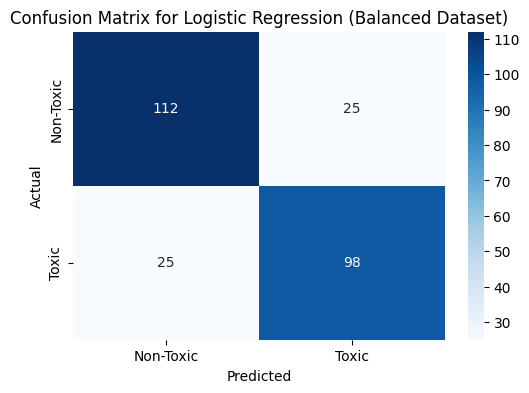

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression (Balanced Dataset)')
plt.show()

8. ) Conclusion from the data balancing

Balancing the dataset allowed the classifier to perform better on the minority toxic class, leading to more balanced precision, recall, and F1-scores. This highlights the importance of addressing class imbalance in machine learning problems to ensure fair model performance across all classes.

# Clustering

1. ) Vectorize the clean_text data using TF-IDF

In [ ]:
combined_df['clean_text'] = combined_df['clean_text'].apply(lambda x: ' '.join(x))
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(combined_df['clean_text'])

2. ) Apply PCA for dimensionality reduction (to 2 components for visualization)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

3. ) Apply KMeans clustering to create two clusters

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4. ) Plot the two clusters

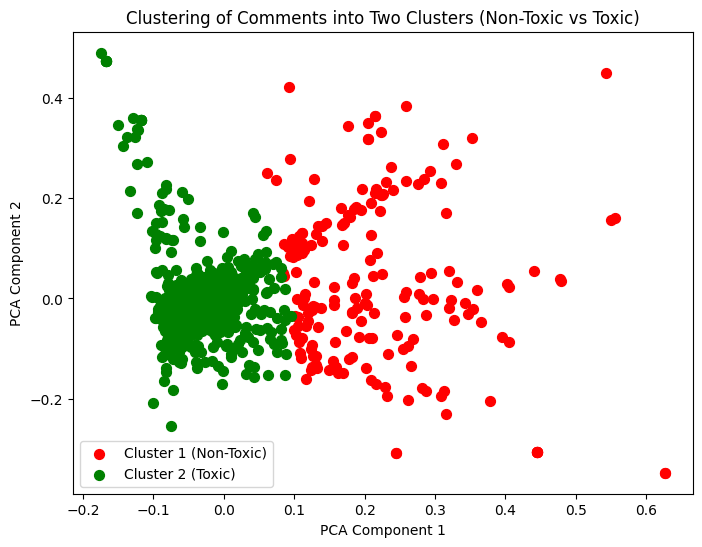

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[clusters == 0, 0], X_pca[clusters == 0, 1], s=50, c='red', label='Cluster 1 (Non-Toxic)')
plt.scatter(X_pca[clusters == 1, 0], X_pca[clusters == 1, 1], s=50, c='green', label='Cluster 2 (Toxic)')
plt.title('Clustering of Comments into Two Clusters (Non-Toxic vs Toxic)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()